In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import random
from time import sleep

In [2]:
h1 = {
'Cookie': 'bid=pWHRXljqlnw; _pk_id.100001.4cf6=1889b80fc0472f29.1700409010.; __utmc=30149280; __utmz=30149280.1700409010.1.1.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not%20provided); __utmc=223695111; __utmz=223695111.1700409010.1.1.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not%20provided); _ga=GA1.1.5521471.1700409010; ll="118282"; __utma=30149280.5521471.1700409010.1700409010.1700411523.2; __utma=223695111.1586942768.1700409010.1700409010.1700411523.2; _vwo_uuid_v2=D6D254F941FF811FF3C5BC45942B6A3E4|40c2965b4880f3c13ff94c0a7cdc0e98; _ga_RXNMP372GL=GS1.1.1700413503.2.0.1700413503.60.0.0; _pk_ref.100001.4cf6=%5B%22%22%2C%22%22%2C1700552142%2C%22https%3A%2F%2Fwww.google.com%2F%22%5D; _pk_ses.100001.4cf6=1; ap_v=0,6.0; dbcl2="276019366:j+LEQsNs20s"; ck=_dp9; frodotk_db="98c409fbb250fd78ca4c1df316f2f868"; push_noty_num=0; push_doumail_num=0',
'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
'Accept-Encoding': 'gzip, deflate',
'Host': 'movie.douban.com',
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.4 Safari/605.1.15',
'Accept-Language': 'zh-CN,zh-Hans;q=0.9',
'Connection': 'keep-alive'
}

In [3]:
ip_list = []

with open('proxy.txt', 'r') as f:
    for line in f.readlines():
        ip_list.append(line.strip())

#获取ip代理
def getip():
    proxy= ip_list[random.randint(0,len(ip_list)-1)]
    proxy = proxy.replace("\n","")
    proxies={
        'http':'http://'+str(proxy),
        #'https':'https://'+str(proxy),
    }
    return proxies

In [4]:
def trans_star(v_str):
    v_str = v_str[0]
    if v_str == 'allstar10':
        return '1'
    elif v_str == 'allstar20':
        return '2'
    elif v_str == 'allstar30':
        return '3'
    elif v_str == 'allstar40':
        return '4'
    elif v_str == 'allstar50':
        return '5'
    else:
        return 'NaN'

In [5]:
def get_short(movie_url, max_page, data_path, file_name):
    df = pd.DataFrame()
    path =data_path + file_name + '.csv'
    if os.path.exists(path):
        print("file exists")
        return 0
    for i in range(0, max_page):
        url = movie_url + 'comments?start=' + str(i*20) + '&limit=20&status=P&sort=new_score'
        res = requests.get(url, headers=h1, verify=False, proxies=getip())
        soup = BeautifulSoup(res.text, 'html.parser')
        user_names = soup.find_all('span', class_='comment-info')
        user_names = [i.find('a').text for i in user_names]
        stars = soup.find_all('span', class_='comment-info')
        stars = [i.find_all('span')[1]['class'] for i in stars]
        stars = [trans_star(i) for i in stars]
        comment_times = soup.find_all('span', class_='comment-time')
        comment_times = [i.text.strip() for i in comment_times]
        geo_ips = soup.find_all('span', class_='comment-location')
        geo_ips = [i.text for i in geo_ips]
        votes = soup.find_all('span', class_='votes vote-count')
        votes = [i.text for i in votes]
        shorts = soup.find_all('span', class_='short')
        shorts = [i.text for i in shorts]
        shorts = [i.replace(',', '，').replace(' ', '').replace('\n', '').replace('\r', '') for i in shorts]

        pd_data = {'user_name': user_names, 'star': stars, 'comment_time': comment_times, 'geo_ip': geo_ips, 'vote': votes, 'short': shorts}
        df = pd.concat([df, pd.DataFrame(pd_data)], axis=0)
        print('Page ' + str(i+1) + ' is done!')

    if len(df) < 10:
        print('No data!')
        return 1

    df.to_csv(path, index=False)
    return 0

In [6]:
#test
movie_url = 'https://movie.douban.com/subject/35267224/'
max_page = 2
data_path = './data/'
file_name = 'test'
get_short(movie_url, max_page, data_path, file_name)

file exists


0

In [ ]:
# search movies by name
name = ''
movie_list = pd.read_csv('../analysis/MovieDouban250.csv')
# each line as a movie, convert to list of dict
movie_list = movie_list.to_dict('records')

for movie in movie_list:
    if name in movie['电影名称']:
        print(movie)


In [9]:
# search movies by id
id = 1
df = pd.DataFrame()
for movie in movie_list:
    if id == movie['Unnamed: 0']:
        file_name = movie['电影名称'].replace(' ', '').split('/')[0]
if os.path.exists('./data/' + file_name + '.csv'):
    print('file exists!')
    df = pd.read_csv('./data/' + file_name + '.csv')
else:
    print('file not exists!')
    get_short(movie['电影链接'], 30, './data/', file_name)
    df = pd.read_csv('./data/' + file_name + '.csv')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path  
from PIL import Image  
from wordcloud import WordCloud, ImageColorGenerator  
import jieba
from collections import Counter


file exists!


In [10]:
df_star = df.groupby(['star'])['star'].count()
df_star

star
1.0     11
2.0     16
3.0     18
4.0     84
5.0    461
Name: star, dtype: int64

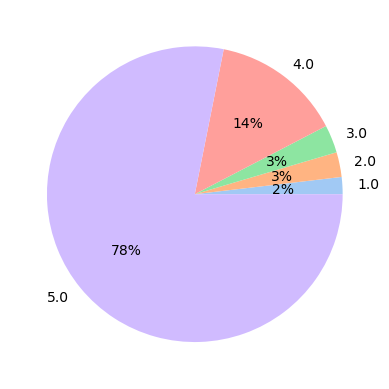

In [11]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df_star, labels = df_star.index.tolist(), colors = colors, autopct='%.0f%%')
plt.show()

In [20]:
df_date = pd.to_datetime(df['comment_time']).dt.strftime('%Y-%m')
df_date = df_date.groupby(df_date).count()
df_date

comment_time
2005-07     1
2005-09     1
2005-10     1
2005-11     2
2005-12     1
           ..
2023-04     3
2023-06     1
2023-08     2
2023-09     6
2023-10    10
Name: comment_time, Length: 183, dtype: int64

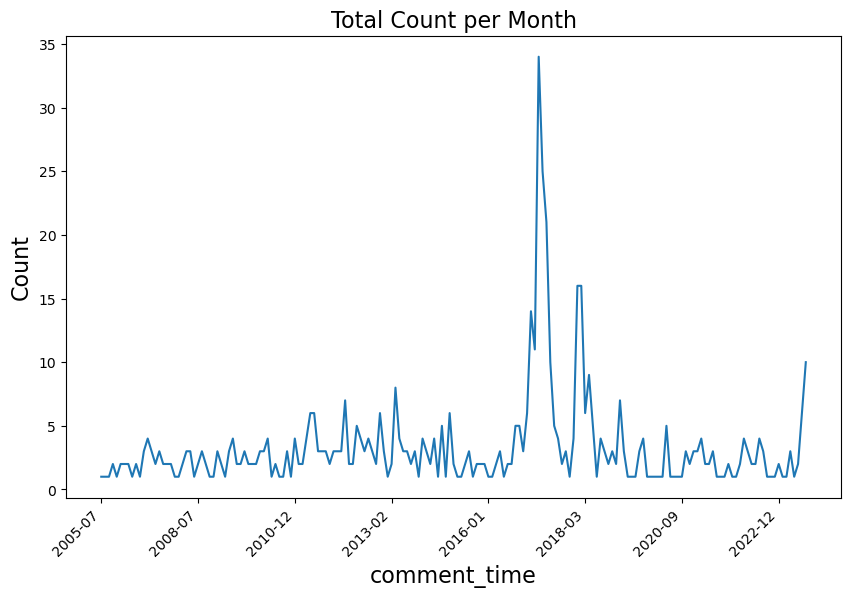

In [27]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Total Count per Month', fontsize=16)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
df_date.plot(kind='line', ax=ax)
plt.xticks(rotation=45, ha='right')
plt.show()


c:\Users\shaoh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaoh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaoh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaoh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

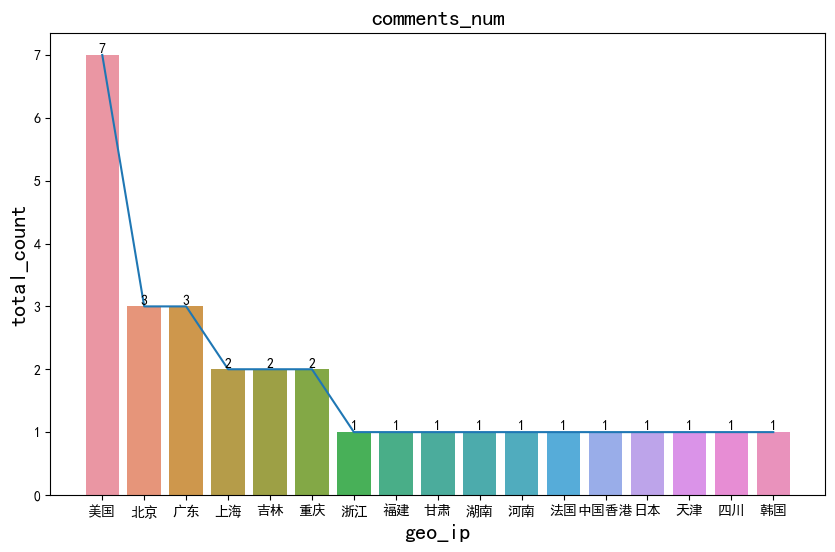

In [35]:
plt.rcParams['font.sans-serif']=['SimHei']
geo_ips = df.groupby(['geo_ip'])['geo_ip'].count().sort_values(ascending=False)
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('comments_num', fontsize=16)
ax1.set_xlabel('geo_ips', fontsize=16)
ax1.set_ylabel('total_count', fontsize=16)
ax1 = sns.barplot(x=geo_ips.index, y = list(geo_ips))
ax1.tick_params(axis='y')
ax1.bar_label(ax1.containers[0])
ax2 = sns.lineplot(x=geo_ips.index, y = list(geo_ips))
ax2.tick_params(axis='y')

In [47]:
stopwords = set()
content = [line.strip() for line in open('../analysis/cn_stopwords.txt','r').readlines()]
stopwords.update(content)

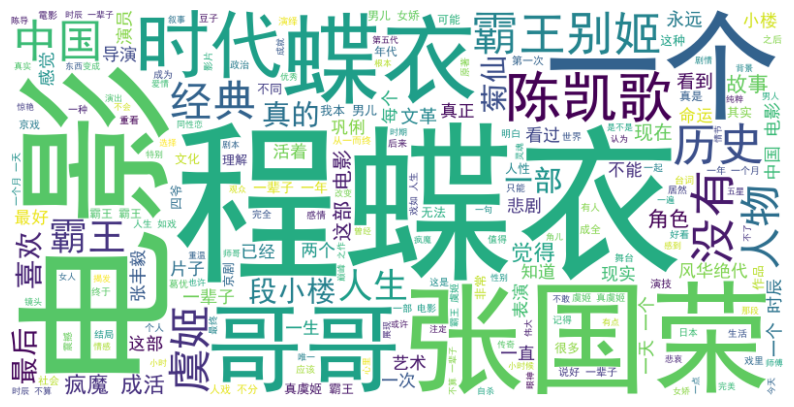

In [54]:
# Combine all shorts into a single string
all_shorts = ' '.join(df['short'])
words = jieba.cut(all_shorts)
words = [word for word in words if len(word) > 1]
words = [word for word in words if word not in stopwords]
words = ' '.join(words)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, font_path='C:\Windows\Fonts\simhei.ttf').generate(words)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Sentiment 

In [56]:
from cnsenti import Sentiment

In [63]:
df_senti = df.copy()
df_senti = df_senti[['user_name','short']]

senti = Sentiment()

# calculate sentiment for each short
def get_sentiment(short):
    return senti.sentiment_count(short)

df_senti['sentiment'] = df_senti['short'].apply(get_sentiment)
df_senti['sentiment'] = df_senti['sentiment'].apply(lambda x: 'positive' if x['pos'] > x['neg'] else 'negative' if x['pos'] < x['neg'] else 'neutral')

df_senti.head()

,user_name,short,sentiment
0,momo,陈凯歌可以靠它吃两辈子饭了，现在看来江郎才尽也情有可原,neutral
1,沉歌,他竟当面一语点破：虞姬是真虞姬，霸王是假霸王。,neutral
2,蚂蚁没问题,就凭这个，我愿意原谅陈凯歌一切的烂片你只要伟大过一次就可以了就凭这个哥哥你是我心中永远不朽的...,positive
3,kingfish,不解，拍出过霸王别姬的人怎能拍出无极来,neutral
4,老鸡｜扶立,在野路子出身的张国荣面前，学院出身的张丰毅显得那么单薄,neutral


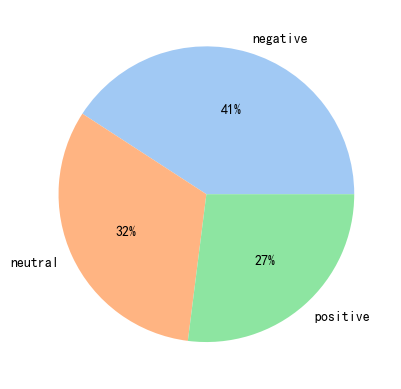

In [68]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df_senti.groupby(['sentiment'])['sentiment'].count(), labels = df_senti.groupby(['sentiment'])['sentiment'].count().index.tolist(), colors = colors, autopct='%.0f%%')
plt.show()